In [410]:
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [193]:
#read training data
data=pd.read_table('phy_train.dat',header=None)

In [194]:
#read testing data
unseen=pd.read_table('phy_test.dat',header=None)

In [195]:
data.shape

(50000, 81)

In [196]:
#names the columns for easy referencing
column_names = ["V" + suit for suit in [str(x) for x in list(range(0,81))]]


In [197]:
#names the columns for easy referencing
unseen_col_names=["V" + suit for suit in [str(x) for x in list(range(0,80))]]

In [198]:
data.columns=column_names

In [199]:
unseen.columns=unseen_col_names

In [200]:
#build an empty dataframe with id numbers for submission in the online platform
prediction=pd.DataFrame(unseen.V0)

In [201]:
#delete unnecessary columns for training 
del data['V80']
del data['V0']

In [202]:
#delete unnecessary columns for training 
del unseen['V0']
del unseen['V1']

In [354]:
unseen_col_names=["V" + suit for suit in [str(x) for x in list(range(1,79))]]

In [355]:
unseen.columns=unseen_col_names

In [76]:
X=data.iloc[:,1:79]
y=data.V1

In [85]:
print(X.shape)
print(y.shape)

(50000, 78)
(50000,)


In [107]:
#replace missing values denoted by 999.0 and 9999.0 with NaNs
X.replace(999.0, np.nan)
X.replace(9999.0, np.nan)


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.876238,0.079785,...,-1.0,-0.036906,-0.000724,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.920167,0.817883,-0.646473,-1.0,0.000000,0.000000,0.000000,0.0,0.401383,0.471188,...,-1.0,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1.0,1.0,0.302235,0.950770
2,0.868397,0.178202,0.150828,-1.0,0.000000,0.000000,0.000000,0.0,0.773496,1.046599,...,1.0,0.908824,0.550843,0.868397,0.178202,0.150828,-1.0,1.0,0.001421,0.882853
3,0.000000,0.000000,0.000000,0.0,1.577894,0.000000,-0.369792,-1.0,1.417021,0.432868,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.105217,0.824695,...,1.0,0.000005,0.400702,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.862227,1.256105,...,1.0,0.013497,0.636281,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.347191,0.075018,...,1.0,0.983739,0.012596,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.661172,0.956303,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.983857,0.150193,...,1.0,0.853028,0.683199,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,1.100601,0.000000,-0.995958,1.0,0.145696,0.072390,...,1.0,0.000389,0.212899,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [108]:
#Do mean imputation
imp = Imputer(strategy='mean', axis=0)
X_imputed = imp.fit_transform(X)

In [129]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
...     X_imputed, y, test_size=0.33, random_state=42)
...

In [239]:
#classifier training and reporting accuracy on test data without feature selection
def cross_validated_results():
    classifiers = {
        "Naive Bayes"         : GaussianNB(),
        "Gradient Boost"      : GradientBoostingClassifier(),
        "Adaboost"            : AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
        "Decision Tree"       : DecisionTreeClassifier(),
        "Extra Random Trees"  : ExtraTreesClassifier(n_estimators=300),
        "Logistic Regression" : LogisticRegression(),
        "K-Nearest-Neighbors" : KNeighborsClassifier(),
        "SVM"                 : LinearSVC(),
        "Random Forest"       : RandomForestClassifier(n_estimators=300)
    }
    
    for i in classifiers:
        # cross validation
        print(i)
        scores = cross_val_score(classifiers[i], X_imputed, y, cv=5)
        score.append(scores)
        print(i,scores.mean())
  

    


In [240]:
cross_validated_results()

Naive Bayes
Naive Bayes 0.6762999366889993
Gradient Boost
Gradient Boost 0.7239400088738002
Adaboost
Adaboost 0.7055398788147988
Decision Tree
Decision Tree 0.6470799385879994
Extra Random Trees
Extra Random Trees 0.7119400008498
Logistic Regression
Logistic Regression 0.7088398748191989
K-Nearest-Neighbors
K-Nearest-Neighbors 0.6302601045038011
SVM
SVM 0.580519796231798
Random Forest
Random Forest 0.7172999488609995


In [238]:
score=[]

In [251]:
means=[np.mean(score[i]) for i in range(0,len(score))]

In [252]:
names=["Naive Bayes","Gradient Boost","Adaboost","Decision Tree","Extra Random Trees","Logistic Regression","K-Nearest-Neighbors","SVM",        
        "Random Forest"]       


<BarContainer object of 9 artists>

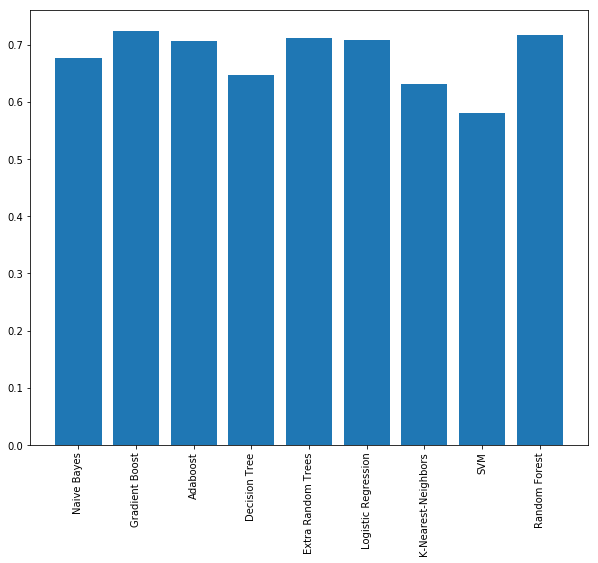

In [257]:
f = plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.bar(names,means)

In [305]:
#classifier training and reporting accuracy on test data without feature selection
def test_results(X_train,y_train,X_test, y_test, test):
    classifiers = {
        "Naive Bayes"         : GaussianNB(),
        "Gradient Boost"      : GradientBoostingClassifier(),
        "Adaboost"            : AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
        "Decision Tree"       : DecisionTreeClassifier(),
        "Extra Random Trees"  : ExtraTreesClassifier(n_estimators=300),
        "Logistic Regression" : LogisticRegression(),
        "K-Nearest-Neighbors" : KNeighborsClassifier(),
        "SVM"                 : LinearSVC(),
        "Random Forest"       : RandomForestClassifier(n_estimators=300)
    }
    
    for i in classifiers:
        # cross validation
        print(i)
        model=classifiers[i].fit(X_train,y_train)
        test.append(accuracy_score(y_test,model.predict(X_test)))
        print(accuracy_score(y_test,model.predict(X_test)))
    
    return test

In [303]:
test=[]

In [267]:
test_results(X_train,y_train,test)

Naive Bayes
0.6731515151515152
Gradient Boost
0.7211515151515151
Adaboost
0.7049090909090909
Decision Tree
0.6452727272727272
Extra Random Trees
0.7072121212121212
Logistic Regression
0.7066060606060606
K-Nearest-Neighbors
0.6252727272727273
SVM
0.5357575757575758
Random Forest
0.7124242424242424


<BarContainer object of 9 artists>

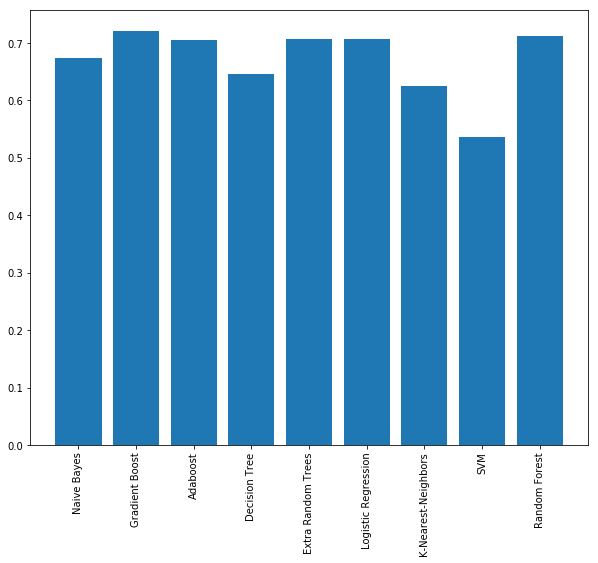

In [268]:
f = plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.bar(names,test)

In [269]:
RF=RandomForestClassifier()

In [270]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
#feature importances
importances = list(RF.feature_importances_)


In [273]:
x_values = list(range(len(importances)))


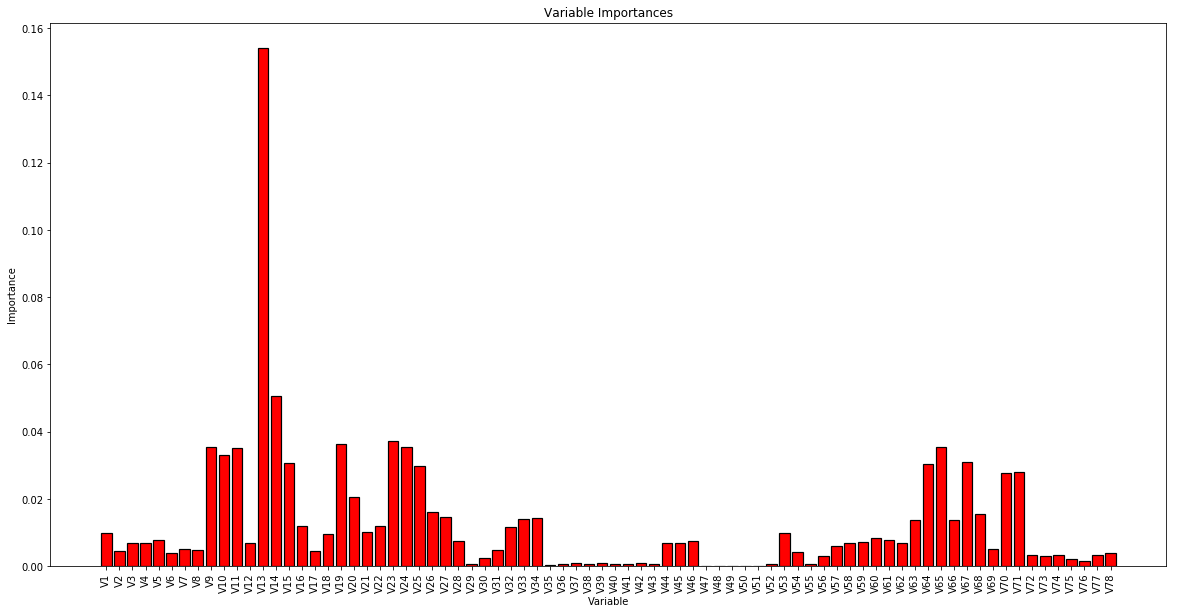

In [280]:
f = plt.figure(figsize=(20,10))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, data.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

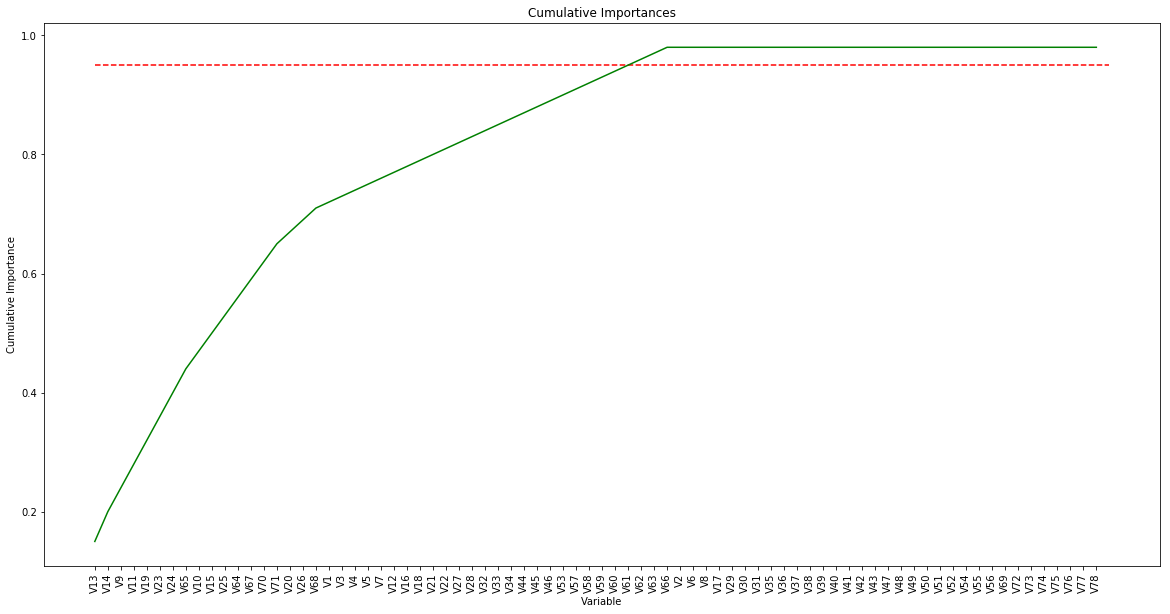

In [287]:
#cumulative feature importances and cutoff
f = plt.figure(figsize=(20,10))
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [288]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 42


In [319]:
important_feature_names = [feature[0] for feature in feature_importances[0:41]]
important_indices = [data.columns.tolist().index(feature) for feature in important_feature_names]

In [320]:
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]

In [321]:
test_feature_red=[]
test_95=test_results(important_train_features,y_train,important_test_features, y_test, test_feature_red)

Naive Bayes
0.668
Gradient Boost
0.694060606060606
Adaboost
0.689030303030303
Decision Tree
0.6309090909090909
Extra Random Trees
0.7013939393939393
Logistic Regression
0.6882424242424242
K-Nearest-Neighbors
0.6156969696969697
SVM
0.5967272727272728
Random Forest
0.7056969696969697


<BarContainer object of 9 artists>

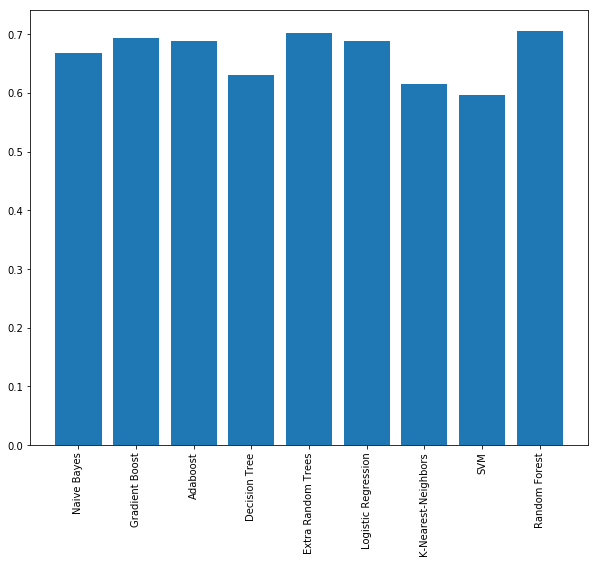

In [322]:
f = plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.bar(names,test_feature_red)

In [369]:
#hyperparameter tuning
#Gradient boost
gb = GradientBoostingClassifier()
parameters = {'max_depth' : np.arange(8,11),'n_estimators' : [300,400]}
classifier = GridSearchCV(gb, parameters, scoring='accuracy')
classifier.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 8,  9, 10]), 'n_estimators': [300, 400]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [374]:
classifier.best_params_

{'max_depth': 8, 'n_estimators': 400}

In [379]:
#hyperparameter tuning: Random forest
RForest=RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
grid_search = GridSearchCV(estimator = RForest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] bootstrap=True, max_depth=80, max_features=2, min_sa

[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.0min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 -  11.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 -  11.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 -  20.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 -  21.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_

[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.0min


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 -  12.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 -  13.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 -  12.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 -   5.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_

[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  5.8min


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 -  10.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 -  10.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 -  10.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500 -  27.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [380]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [389]:
#Hyperparameter tuning: ADABOOST
base_est = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
ADA=AdaBoostClassifier(base_estimator=base_est)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
grid_search_ada = GridSearchCV(ADA, param_grid=param_grid, scoring = 'roc_auc',cv=3)
grid_search_ada.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [391]:
grid_search_ada.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 1}

In [393]:
#hyperparameter tuning: extratrees
etrees=ExtraTreesClassifier()

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
grid_search_et = GridSearchCV(estimator = etrees, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_et.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50

[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   39.2s


[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 -  11.5s
[CV] max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 -   3.5s
[CV] max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 -   6.8s
[CV] max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 -   6.8s
[CV] max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 -   6.7s
[CV] max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV] 

[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  1.8min


[CV]  max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 -   3.0s
[CV] max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 -   5.9s
[CV] max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 -   6.1s
[CV] max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 -   9.9s
[CV] max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 -  10.1s
[CV] max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  m

[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  3.7min


[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 -   9.5s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 -   5.6s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500 -  18.6s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 -   5.3s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 -   9.2s
[CV] max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [394]:
grid_search_et.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 500}

In [405]:
#hyperparameter tuning: Logistic regression
LR=LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search_lr = GridSearchCV(estimator = LR, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search_lr.fit(X_train,y_train)
    

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.001 .........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=1 .............................................................
[CV] C=1 .............................................................
[CV] C=1 .............................................................
[CV] C=10 ............................................................
[CV] C=10 .......

[Parallel(n_jobs=-1)]: Done   7 out of  21 | elapsed:    6.7s remaining:   13.5s


[CV] ................................................... C=10 -   6.4s
[CV] ................................................... C=10 -   6.4s
[CV] .................................................. C=0.1 -   7.5s
[CV] ................................................... C=10 -   7.2s
[CV] .................................................. C=0.1 -   7.4s
[CV] .................................................... C=1 -   7.3s
[CV] .................................................. C=100 -   6.9s
[CV] .................................................... C=1 -   8.4s
[CV] ................................................. C=1000 -   6.7s
[CV] ................................................. C=1000 -   7.3s
[CV] .................................................. C=100 -   8.5s


[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:   10.2s remaining:    1.7s


[CV] .................................................. C=100 -   9.3s
[CV] .................................................... C=1 -   9.7s
[CV] ................................................. C=1000 -   9.1s


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   11.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [406]:
grid_search_lr.best_params_

{'C': 0.1}

In [414]:
#First ensemble
gb=GradientBoostingClassifier(max_depth=8,n_estimators=400)
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
rf=RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=8,max_features=3,max_depth=80)
eclf1 = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('ada',ada)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

In [415]:
accuracy_score(eclf1.predict(X_test),y_test)

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7144848484848485

In [417]:
pred_comb1=eclf1.predict(unseen)

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [418]:
prediction['V1']=pred_comb1

In [419]:
#saving predictions to file for submission
prediction.to_csv(r'ensemble1.txt', header=None, index=None, sep=' ', mode='a')


In [420]:
#Second Ensemble
gb=GradientBoostingClassifier(max_depth=8,n_estimators=400)
lr=LogisticRegression(C=0.1)
rf=RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=8,max_features=3,max_depth=80)
et=ExtraTreesClassifier(max_depth=110,max_features=3,min_samples_leaf=3,min_samples_split=12,n_estimators=500)
eclf2 = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr',lr),('et',et)], voting='hard')
eclf2 = eclf2.fit(X_train, y_train)


In [421]:
accuracy_score(eclf2.predict(X_test),y_test)

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7114545454545455

In [422]:
pred_comb2=eclf2.predict(unseen)

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [423]:
prediction['V1']=pred_comb1

In [424]:
#saving predictions to file for submission
prediction.to_csv(r'ensemble2.txt', header=None, index=None, sep=' ', mode='a')
